In [2]:
%load_ext autoreload 
%autoreload 2

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# Data classes

In [ ]:
from cbviz.cbviz.utils import DataNum

In [ ]:
all = pd.read_csv('./Metabolite-logFC-Signatures.csv', index_col=0)
df = all.iloc[:, [0,2]].copy()

dn = DataNum(df, ncols=2)

In [ ]:
expected = np.repeat('floating', 1)
observed = df.apply(infer_dtype).values
type(expected)

In [ ]:
s1 = np.random.permutation(np.repeat(['WT', 'Balanced', 'Minor', 'Major'], (30, 80, 50, 30)))
s2 = np.repeat(['Basal-like', "Classical"], (57, 133))
x = [y for x in [np.random.normal(loc=i, size=s) for i, s in zip((2, -2) , (57, 133)) ] for y in x]

df2 = pd.DataFrame({"x" : x, "s1" : s1, "s2" : s2})
df2['s1'] = df2['s1'].astype('category')

In [ ]:
from cbviz.cbviz.utils import DataMix

In [ ]:
DataMix(df2, ncat=2)

In [ ]:
df = pd.DataFrame({'Age':np.random.randint(low=40, high=90, size=50), 'group':np.repeat(('ctrl', 'polyp'), (25, 25))})

In [ ]:
DataMix(df)

# KDE related 

## Split violin 

In [ ]:
s1 = np.random.permutation(np.repeat(['WT', 'Balanced', 'Minor', 'Major'], (30, 80, 50, 30)))
s2 = np.repeat(['Basal-like', "Classical"], (57, 133))
x = [y for x in [np.random.normal(loc=i, size=s) for i, s in zip((2, -2) , (57, 133)) ] for y in x]

data = pd.DataFrame({"x" : x, "s1" : s1, "s2" : s2})

In [ ]:
from cbviz.cbviz.kdetools import SplitViolin

In [ ]:
sp = SplitViolin(data, s1_order=['WT', 'Balanced', 'Minor', 'Major'], s2_order=['Classical', 'Basal-like'])

In [ ]:
plt.style.use('cviz')
fig, ax = plt.subplots(figsize=(3,2.5))

for kde in sp.get_violins(colors=('cornflowerblue', 'salmon')):

    ax.fill_betweenx(kde.density, kde.grid, facecolor=kde.color, alpha=0.5)
    ax.plot(kde.mode.ycoords, kde.mode.xcoords, lw=0.5, c='k')

ax.set_yticks(*sp.get_s1_ticks())

leg = ax.legend(handles=sp.get_s2_legend(colors=('cornflowerblue', 'salmon')), 
                loc='upper left', handlelength=0.4,
                bbox_to_anchor=(0, 1.0, 0, 0.15), ncol=2, fontsize='x-small')
leg.get_frame().set_linewidth(0.2)

[ax.axhline(i, lw=0.5, ls=":", c='0.5') for i in (sp.get_s1_ticks()[0])]
ax.set_xlabel(sp.ylabel)
# fig.savefig('./test/Test-SplitViolin.pdf')

## Ridge plot

In [ ]:
s1 = np.repeat(['WT', 'Balanced', 'Minor', 'Major'], (30, 80, 50, 30))
x = [y for x in [np.random.normal(loc=i, size=s) for i, s in zip(range(4) , (30, 80, 50, 30)) ] for y in x]

data = pd.DataFrame({"x" : x, "s1" : s1})
data

In [ ]:
from cbviz.cbviz.kdetools import Ridge

In [ ]:
rp = Ridge(data, s1_order=['WT','Balanced', 'Minor', 'Major'], scale_factor=1.2)

In [ ]:
plt.style.use('cviz')
fig, ax = plt.subplots(figsize=(3,2.5))

for kde in rp.get_kdes():

    ax.fill_betweenx(kde.density, kde.grid, facecolor=kde.color, alpha=0.3)
    ax.plot(kde.mode.ycoords, kde.mode.xcoords, lw=0.1, c='k')

ax.set_yticks(*rp.get_s1_ticks())
ax.set_xlabel(rp.ylabel)
[ax.axhline(i, ls=':', lw=0.25, c='0.15') for i in rp.get_s1_ticks()[0]]

# Scatterplots

## XYview

In [ ]:
metabolites = ['L-Cystine', 'Cysteine', 'NADH']

In [ ]:
all = pd.read_csv('./Metabolite-logFC-Signatures.csv', index_col=0)
df = all.iloc[:, [0,2]].copy()

In [ ]:
from cbviz.cbviz.xytools import XYview
from adjustText import adjust_text

In [ ]:
cond = df.index.isin(metabolites)
xv = XYview(df, highlight=metabolites, s=np.where(cond, 40, 10), c=np.where(cond, 'r', '.5'), alpha=1)

In [ ]:
!pip install adjustText

In [ ]:
plt.style.use('cviz')

fig, ax = plt.subplots(figsize=(3,3))

ax.scatter(xv.x, xv.y, **xv.scatter_kw)
xv.add_correlation(fontsize='small')
xv.add_reg_line(color='cornflowerblue', lw=1)
xv.label_dots(adjust=True, fontsize='small')
xv.label_xy()
fig.savefig('./test/Test-XYview.pdf')

## XYpairs

In [ ]:
from cbviz.cbviz.xytools import XYpairs

In [ ]:
metabolites = ['L-Cystine', 'Cysteine', 'NADH']

In [ ]:
all = pd.read_csv('./Metabolite-logFC-Signatures.csv', index_col=0)

In [ ]:
np.ptp(all.values.ravel()) * 0.02

In [ ]:
all = all.iloc[:, [1,0,3,2]]

In [ ]:
cond = all.index.isin(metabolites)
xp = XYpairs(all, lower_tri=False)

In [ ]:
plt.style.use('cviz')

fig = plt.figure(figsize=(5, 5))

gs = xp.add_gridspec(hspace=0.3, wspace=0.4)

pairs = xp.get_pairs(highlight=metabolites, s=np.where(cond, 40, 10), c=np.where(cond, 'r', '0.5'), alpha=np.where(cond, 1, 0.5))
for pair in pairs:
    ax = fig.add_subplot(gs[pair.position])
    ax.tick_params(labelsize='xx-small', pad=0)
    xv = pair.XYview
    ax.scatter(xv.x, xv.y, **xv.scatter_kw)
    xv.add_reg_line()
    xv.label_dots(adjust=True, fontsize='x-small')
    if pair.combo == ['FG_effect_sgNT', 'sgARNTL2_effect_FG']:
        xv.add_correlation(loc=1)
    else:
        xv.add_correlation(loc=4)
    xv.label_xy(fontsize='x-small', outer=True)

## XYzoom

In [ ]:
metabolites = ['L-Cystine', 'Cysteine', 'NADH']
all = pd.read_csv('./Metabolite-logFC-Signatures.csv', index_col=0)
df = all.iloc[:, [0,2]].copy()

In [ ]:
from cbviz.cbviz.xytools import XYzoom

In [ ]:
xz = XYzoom(df, ('min', 0), ('min', 0))

In [ ]:
top5 = xz.zoom_data.mean(1).nsmallest(5).index.to_list()
cond = xz.data.df.index.isin(top5)

In [ ]:
top5

In [ ]:
plt.style.use('cviz')

xz = XYzoom(df, ('min', 0), ('min', 0))

top5 = xz.zoom_data.mean(1).nsmallest(5).index.to_list()
cond = xz.data.df.index.isin(top5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4,2))

ax2.scatter(xz.x, xz.y, **xz.scatter_kw)
xz.add_xy_line(ax2)
xz.add_rect(ax=ax2)
ax1.scatter(xz.x, xz.y, s=np.where(cond, 20, 5), c=np.where(cond, 'r', '.5'), alpha=0.5, linewidths=0)
xz.connect(ax2, ax1, 'left', lw=0.5, ls=':')
xz.label_xy(ax=ax1, outer=False, fontsize='x-small')
xz.label_dots(top5, ax=ax1, adjust=True, adjust_kwargs={'arrowprops':{'arrowstyle':'-', 'lw':0.2}}, fontsize=4)

# Boxplots

## Box plus strip plot

In [ ]:
s1 = np.repeat(['WT', 'Balanced', 'Minor', 'Major'], (30, 80, 50, 30))
x = [y for x in [np.random.normal(loc=i, size=s) for i, s in zip(range(4) , (30, 80, 50, 30)) ] for y in x]

data = pd.DataFrame({"x" : x, "s1" : s1})
data

In [ ]:
from cbviz.cbviz.bptools import StripBox

In [ ]:
sb = StripBox(data, p_method_global='Anova', s1_order=['WT', 'Balanced', 'Minor', 'Major'])

In [ ]:
plt.style.use('cviz')

fig, ax = plt.subplots(figsize=(2.5,2.5))

sb.boxplt()
sb.add_strips(s=20, alpha=0.50, linewidths=0)
sb.add_global_p(fontsize='xx-small')

In [ ]:
sb.calc_pairwise_p(adj_method='fdr_bh')

In [ ]:
plt.style.use('cviz')

fig, ax = plt.subplots(figsize=(3, 2.5))

sb.boxplt()
sb.add_strips(s=20, alpha=0.50, linewidths=0)
sb.add_pair_p(groupA='WT', groupB='Minor', yoffset=0.5, cut_p=True)

In [ ]:
from scipy.stats import f_oneway, ttest_ind

In [ ]:
x, y = [np.random.normal(i, size=100) for i in range(2)]

In [ ]:
data['s1'] = data['s1'].astype('category')

In [ ]:
from pandas.api.types import is_categorical_dtype
def cat_cleaner(series):
    if is_categorical_dtype(series):
        return series.cat.remove_unused_categories()
    else:
        return series

In [ ]:
data[data['s1'].isin(['WT', 'Balanced'])]['s1']#.apply(cat_cleaner)

In [ ]:
data[data['s1'].isin(['WT', 'Balanced'])].apply(cat_cleaner)['s1']

# Dotplot

In [ ]:
df = pd.read_csv('./Dotplot_input.csv')

In [ ]:
from cbviz.cbviz.xytools import Dotplot

In [ ]:
hm = pd.read_table('/home/carlo/Documents/Data/HALLMARK_related/Hallmark_Sets_PerCategory.tsv')
hm = hm[hm['Name'].isin(df['y'])]
df['y'] = df['y'].astype('category').cat.reorder_categories(hm['Name'].to_list())

In [ ]:
hm.sort_values(['Process'], [])

In [ ]:
df['y']

In [ ]:
dp = Dotplot(df, 'x', 'y', 'fdr', 'med_tstat')

In [ ]:
dp.cut_size(bins=[0, 1e-20, 1e-5, 0.05, 1], sizes_out=(0, 5, 20, 50), reverse=True)

In [ ]:
dp.bins

In [ ]:
from matplotlib.colors import CenteredNorm

In [ ]:
plt.style.use('cviz')
fig, ax = plt.subplots(figsize=(1.5, 5))

sp = ax.scatter(dp.x, dp.y, s=dp.size_cut, c=dp.color_raw, cmap=plt.cm.coolwarm, norm=CenteredNorm(0))
dp.set_ticklabels(fontsize='x-small')
ax.set_xlim(-0.5, 5.5)
leg = ax.legend(handles=dp.get_size_handles(reverse=True, marker_sizes=(4, 7, 9)), bbox_to_anchor=(1, 1, 0.2, 0), fontsize='x-small')
leg.get_frame().set_linewidth(0.4)
cax = fig.add_axes([1, 0.7, 0.4, 0.03])
cax.set_xticks([-2.5, 0, 2.5], [-2.5, 0, 2.5], fontsize='x-small')
cax.set_title('Progression stat', loc='left', fontsize='xx-small')
fig.colorbar(sp, cax=cax, orientation='horizontal')
fig.savefig('Figures/DotPlot-HALLMARKvsRPcluster.pdf')

# Corrplot

In [23]:
from cbviz.cbviz.dotplot import Dotplot

In [16]:
df = pd.read_csv('./Corrplot_input.csv')

In [81]:
cdf = df.iloc[:,:20].corr(method='spearman')

In [75]:
cdf.where(np.tril(np.ones(cdf.shape)).astype(bool))

,Albumin,AP,Bilirubin,Harnstoff,Ca,Cholesterin,Krea,CRP,GGT,Glucose,GOT,GPT,HDL,K,LDH,LDL,Mg,Na,Ph,Eiweiß
Albumin,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AP,0.076034,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bilirubin,0.212077,0.035770,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Harnstoff,0.178567,0.244930,0.028606,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ca,0.560017,0.048402,0.192427,0.036841,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cholesterin,0.402080,0.026146,-0.024652,0.151802,0.353741,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Krea,0.187759,0.127143,0.222985,0.607021,-0.037106,0.076844,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRP,-0.138873,0.315335,0.083903,0.185489,-0.070424,0.009114,0.099329,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GGT,0.102578,0.300764,0.336160,0.159764,0.065150,0.125092,0.272895,0.283574,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Glucose,0.096729,0.263990,0.079386,0.223356,0.010031,0.114806,0.108529,0.245320,0.214020,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
from scipy.spatial import distance
from scipy.cluster import hierarchy

In [82]:
zvar = hierarchy.linkage(distance.squareform(1 - cdf), method='complete')
ord = hierarchy.dendrogram(zvar, labels=cdf.index, no_plot=True)['leaves']

In [83]:
cdf = cdf.iloc[ord, ord]

In [84]:
cdf

,LDH,Bilirubin,GGT,GOT,GPT,Harnstoff,Krea,Glucose,AP,CRP,Ph,K,Na,HDL,Mg,Cholesterin,LDL,Ca,Albumin,Eiweiß
LDH,1.000000,0.167542,0.135209,0.383708,0.314477,0.127898,0.098182,0.220963,0.087214,0.047983,-0.188795,0.082689,0.097223,-0.116265,-0.053007,-0.088293,-0.045354,0.001358,0.019440,-0.040959
Bilirubin,0.167542,1.000000,0.336160,0.247031,0.236610,0.028606,0.222985,0.079386,0.035770,0.083903,-0.094205,-0.044543,-0.000204,0.010779,0.138174,-0.024652,0.019142,0.192427,0.212077,0.179917
GGT,0.135209,0.336160,1.000000,0.350828,0.337813,0.159764,0.272895,0.214020,0.300764,0.283574,-0.102864,0.041100,0.086436,-0.221981,0.002218,0.125092,0.125207,0.065150,0.102578,0.234131
GOT,0.383708,0.247031,0.350828,1.000000,0.704225,0.020596,0.037073,0.007882,0.153830,-0.029916,-0.069462,-0.066637,0.001216,-0.164380,-0.056444,-0.035327,-0.032878,0.159727,0.041642,0.168811
GPT,0.314477,0.236610,0.337813,0.704225,1.000000,0.025611,0.082344,0.050727,0.111349,-0.077050,-0.166843,-0.094104,-0.095343,-0.177329,0.023449,-0.051410,0.001879,0.063729,0.047603,0.059533
Harnstoff,0.127898,0.028606,0.159764,0.020596,0.025611,1.000000,0.607021,0.223356,0.244930,0.185489,0.023701,0.112081,0.125243,0.078934,0.049889,0.151802,0.107721,0.036841,0.178567,0.097734
Krea,0.098182,0.222985,0.272895,0.037073,0.082344,0.607021,1.000000,0.108529,0.127143,0.099329,-0.121822,0.150090,0.062578,0.135056,0.181645,0.076844,0.046728,-0.037106,0.187759,0.030900
Glucose,0.220963,0.079386,0.214020,0.007882,0.050727,0.223356,0.108529,1.000000,0.263990,0.245320,-0.063787,0.044744,0.010976,-0.041467,-0.008635,0.114806,0.093657,0.010031,0.096729,0.112233
AP,0.087214,0.035770,0.300764,0.153830,0.111349,0.244930,0.127143,0.263990,1.000000,0.315335,0.202417,-0.033569,0.068347,-0.147838,0.064255,0.026146,0.058111,0.048402,0.076034,0.253042
CRP,0.047983,0.083903,0.283574,-0.029916,-0.077050,0.185489,0.099329,0.245320,0.315335,1.000000,0.110545,-0.020259,-0.111295,-0.089744,-0.062930,0.009114,-0.037004,-0.070424,-0.138873,0.127321


In [85]:
cdf_masked = cdf.where(np.tril(np.ones(cdf.shape)).astype(bool))


In [86]:
dpdf = cdf_masked.melt(var_name='variable', value_name='rho', ignore_index=False).reset_index()

In [87]:
dpdf['index'] = dpdf['index'].astype('category').cat.reorder_categories(cdf.columns.to_list())
dpdf['variable'] = dpdf['variable'].astype('category').cat.reorder_categories(cdf.columns.to_list())

In [91]:
dp = Dotplot(dpdf, x='index', y='variable', size='rho')
dp.cut_size(bins=(0, 0.3, 0.6, 0.99, 1), sizes_out=(0, 100, 130, 0), transform=np.abs)

ValueError: labels must be unique if ordered=True; pass ordered=False for duplicate labels

In [70]:
def _color_light_or_dark(rgba_in:np.ndarray)-> str:
    """[For plotting purposes, we determine whether a color is light or dark and adjust its text color accordingly.
    Also see https://stackoverflow.com/questions/22603510/is-this-possible-to-detect-a-colour-is-a-light-or-dark-colour]

    Args:
        rgba_in ([np.ndarray]): [A numpy array containing RGBA as returned by matplotlib colormaps]

    Returns:
        [str]: [A string: w for white or k for black]
    """
    r,g,b,_ = rgba_in*255
    hsp = np.sqrt(0.299 * (r * r) + 0.587 * (g * g) + 0.114 * (b * b))
    if (hsp>127.5):
        # light color, return black for text
        return 'k'
    else:
        # dark color, return white for text
        return 'w'


Text(0.0, 1.0, "Spearman's rho")

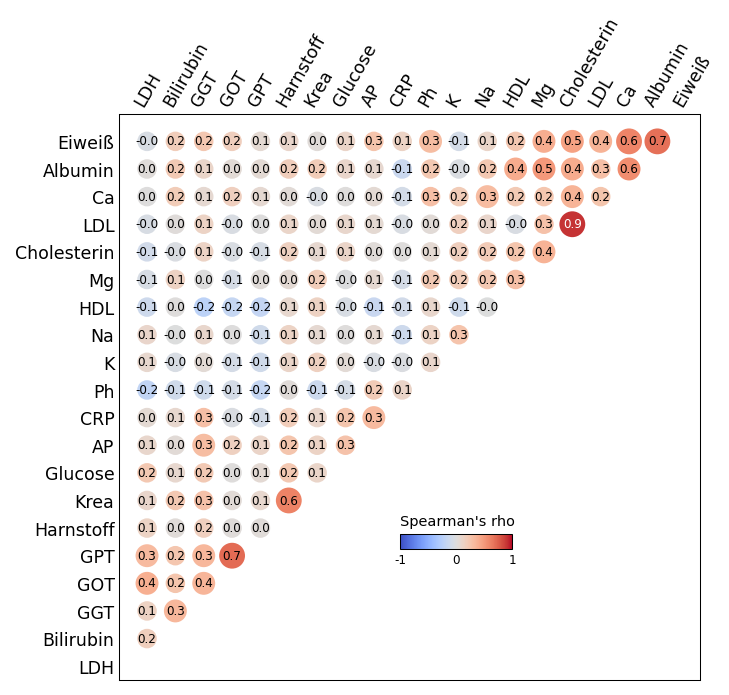

In [90]:
plt.style.use('cviz')
fig, ax = plt.subplots(figsize=(5,5))
from matplotlib.colors import CenteredNorm

sp = ax.scatter(dp.y, dp.x, s=dp.size_cut, c=dp.size_raw, cmap=plt.cm.coolwarm, norm=CenteredNorm(0, 1))
ax.set_ylim(-0.5, dp.data.nrows)
ax.set_xlim(-1, dp.data.ncols-0.5)
ax.set_yticks(range(dp.data.nrows), dp.tick_names.yticks);
ax.set_xticks(range(dp.data.ncols), dp.tick_names.xticks, rotation=60, rotation_mode='anchor', ha='left');
ax.xaxis.tick_top()
for x, y, t, s in zip(dp.x, dp.y, dp.size_raw, dp.size_cut):
    if not np.isnan(t) and s>0:
        color = _color_light_or_dark(np.array(sp.to_rgba(t)))
        ax.text(y, x, f'{t:.1f}', color=color, fontsize='xx-small', ha='center', va='center')
        
cax = fig.add_axes([0.5, 0.3, 0.15, 0.02])
fig.colorbar(sp, cax=cax, orientation='horizontal')
cax.set_xticks((-1, 0, 1), (-1, 0, 1), fontsize='xx-small')
cax.set_title("Spearman's rho", fontsize='x-small')
# fig.savefig('./Polyps/Plots/Correlation-LabValues-Feb14-2022.pdf')